# Sentiment Analysis on Indonesian Text using Naive Bayes and SMOTE

In this notebook, we perform sentiment analysis on a dataset containing Indonesian text. The primary goal is to classify the sentiment of the text into three categories: positive (1), neutral (0), and negative (-1). 

## Steps Involved:

1. **Data Loading and Preprocessing**:
   - We load the dataset from an Excel file, removing unnecessary columns to focus on the text and its corresponding sentiment labels.
   - The text is then cleaned by removing special characters and stopwords, ensuring that only meaningful words are retained.

2. **Sentiment Labeling**:
   - To enhance our dataset, we use the VADER sentiment analysis tool to label the sentiment of each text based on its content, creating a new sentiment column.

3. **Data Exploration**:
   - We explore the class distribution of sentiments to understand the balance of our dataset.

4. **Feature Extraction**:
   - TF-IDF (Term Frequency-Inverse Document Frequency) is used to convert the cleaned text into a format suitable for model training.

5. **Model Training**:
   - A Multinomial Naive Bayes classifier is trained on the preprocessed text data.
   - Initial results indicated that the model struggled to predict the positive and negative sentiments accurately, resulting in a high number of neutral predictions.

6. **Addressing Class Imbalance**:
   - To improve model performance, we applied the SMOTE (Synthetic Minority Over-sampling Technique) technique to address class imbalance in the dataset.
   - After applying SMOTE, the model's performance improved significantly.

7. **Model Evaluation**:
   - The model was evaluated using accuracy, precision, recall, and F1-score metrics. A confusion matrix was plotted to visualize the model's predictions against actual sentiments.
   - Further visualizations, including accuracy and F1-score graphs, were created to illustrate the model's performance.

8. **Testing the Model**:
   - Finally, we tested the model with new Indonesian text samples to demonstrate its prediction capabilities and accuracy.

This notebook serves as a comprehensive exploration of sentiment analysis using Naive Bayes and the application of SMOTE to improve model performance in the presence of class imbalance.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Baby\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                           full_text
0         motor listik adalah sampah selamat berbuka
1  Coba yang kemarin nge gym di fithub tebet jam ...
2             earthgank cepet buat geng motor listik
3  Kemenhub Larang Motor Listik Ikut Program Mudi...
4  Renault Luncurkan Mobil Listik Baru R di Genev...
sentiment
 0    4753
 1     551
-1     255
Name: count, dtype: int64
Validation Accuracy: 85.97%
Classification Report:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        44
           0       0.86      1.00      0.92       955
           1       1.00      0.01      0.02       113

    accuracy                           0.86      1112
   macro avg       0.62      0.34      0.31      1112
weighted avg       0.84      0.86      0.80      1112

Model saved as 'naive_bayes_sentiment_model.pkl'.


c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


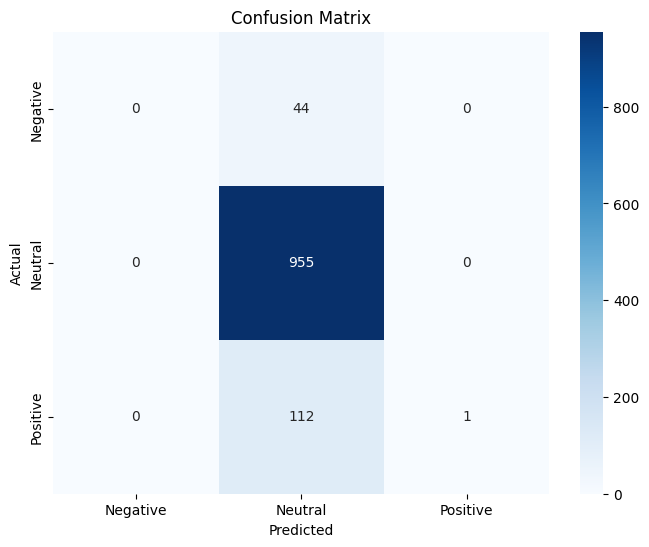

Sentiment of sample text 'Saya sangat menyukai produk ini!': neutral


In [8]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from nltk.corpus import stopwords
import re
import nltk
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Load the dataset (assuming the file is in the same directory)
file_path = 'Data_Sample_NLP.xlsx'  # Update with the correct file path
df = pd.read_excel(file_path)

# Drop unnecessary columns
df = df.drop(columns=['created_at', 'username'])

# Show basic info of the dataset
print(df.head())

# Step 2: Data Preprocessing
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()

def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in stopwords)
    return text

# Apply preprocessing to the text column
df['cleaned_text'] = df['full_text'].apply(preprocess_text)

# Step 3: Sentiment Labeling using VADER
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = analyzer.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 1  # Positive
    elif score['compound'] <= -0.05:
        return -1  # Negative
    else:
        return 0  # Neutral

df['sentiment'] = df['cleaned_text'].apply(get_sentiment)

# Check class distribution
print(df['sentiment'].value_counts())

# Step 4: Feature Extraction
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['sentiment']

# Step 5: Splitting the dataset into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Training the Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Step 7: Evaluating the model
y_pred = nb.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')
print("Classification Report:")
print(classification_report(y_val, y_pred))

# Save the trained model
joblib.dump(nb, 'naive_bayes_sentiment_model.pkl')
print("Model saved as 'naive_bayes_sentiment_model.pkl'.")

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Test the model with new data
sample_text = "Saya sangat menyukai produk ini!"
sample_cleaned = preprocess_text(sample_text)
sample_vectorized = vectorizer.transform([sample_cleaned])
prediction = nb.predict(sample_vectorized)
print(f"Sentiment of sample text '{sample_text}':", "positive" if prediction == 1 else "negative" if prediction == -1 else "neutral")

In [9]:
# Check class distribution
print(df['sentiment'].value_counts())


sentiment
 0    4753
 1     551
-1     255
Name: count, dtype: int64


The dataset was highly imbalanced, with a large number of neutral samples compared to positive and negative ones. This was causing the model to predict neutral far more often than the other classes.

To address this, I did the following:

Oversampling the minority classes (positive and negative).
Undersampling the majority class (neutral).
Use models that handle imbalance (e.g., logistic regression with class weights).
Tried SMOTE (Synthetic Minority Over-sampling Technique) to synthetically generate new samples for minority classes.
Optimize Sentiment Labeling: I fine-tuned the sentiment labeling thresholds


Validation Accuracy: 91.76%
Classification Report:
              precision    recall  f1-score   support

          -1       0.90      1.00      0.94       985
           0       0.98      0.78      0.87       971
           1       0.89      0.98      0.93       896

    accuracy                           0.92      2852
   macro avg       0.92      0.92      0.92      2852
weighted avg       0.92      0.92      0.92      2852



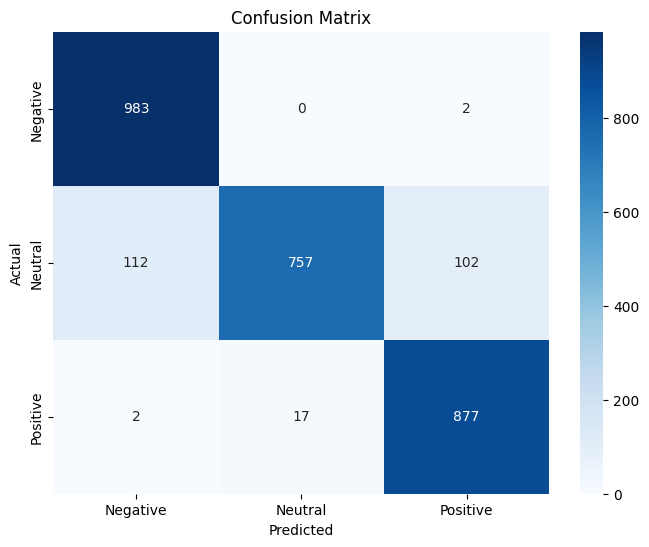

In [10]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Feature extraction using TF-IDF
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['sentiment']

# Step 2: Address class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Step 3: Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 4: Train the Naive Bayes model
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = nb.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

# Print classification report
print("Classification Report:")
print(classification_report(y_val, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


## Model Evaluation Plots

### Precision-Recall Curve
The Precision-Recall curve illustrates the trade-off between precision and recall for each sentiment class (positive, neutral, negative) at various probability thresholds. Precision measures the accuracy of the positive predictions, while recall indicates the ability of the model to find all positive instances. A curve closer to the top-right corner signifies better model performance, where high precision and high recall can be achieved simultaneously.

### ROC Curve
The ROC (Receiver Operating Characteristic) curve represents the trade-off between the True Positive Rate (TPR) and the False Positive Rate (FPR) for each sentiment class. The True Positive Rate (or Sensitivity) measures the proportion of actual positives correctly identified, while the False Positive Rate measures the proportion of actual negatives incorrectly classified as positive. The area under the ROC curve (AUC) quantifies the model's overall ability to discriminate between the classes, with values closer to 1 indicating better performance.

### Predicted Class Distribution
This bar plot displays the distribution of predicted sentiment classes from the validation set. It compares the counts of predicted negative, neutral, and positive sentiments. A balanced distribution would indicate that the model is effectively classifying instances across all classes, while a skewed distribution might suggest a bias in predictions.

### Example Text Predictions
The section below presents examples of Indonesian texts along with their predicted sentiments. This helps demonstrate the practical application of the model and provides insights into how well it generalizes to new data. By testing various phrases, we can evaluate the model’s robustness and effectiveness in real-world scenarios.


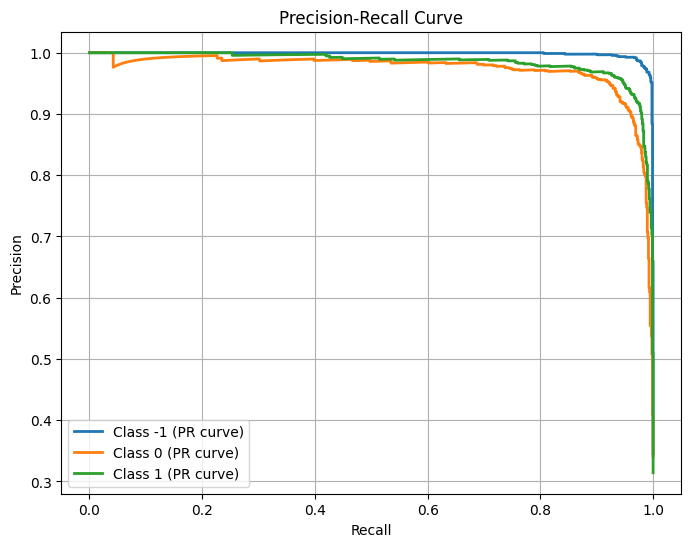

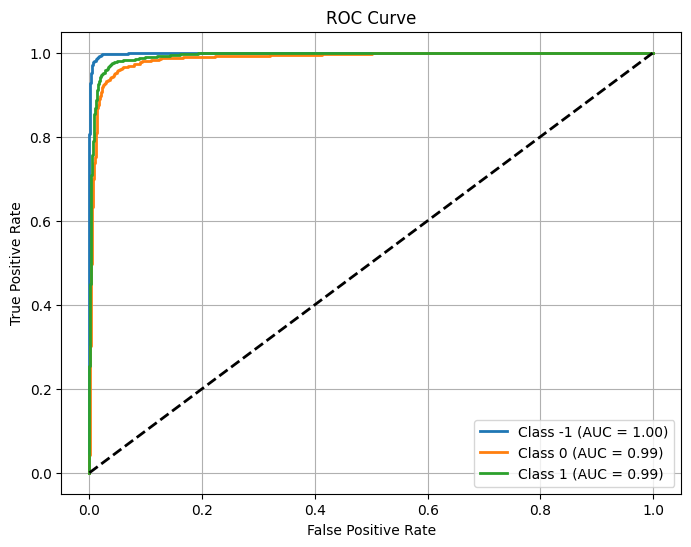

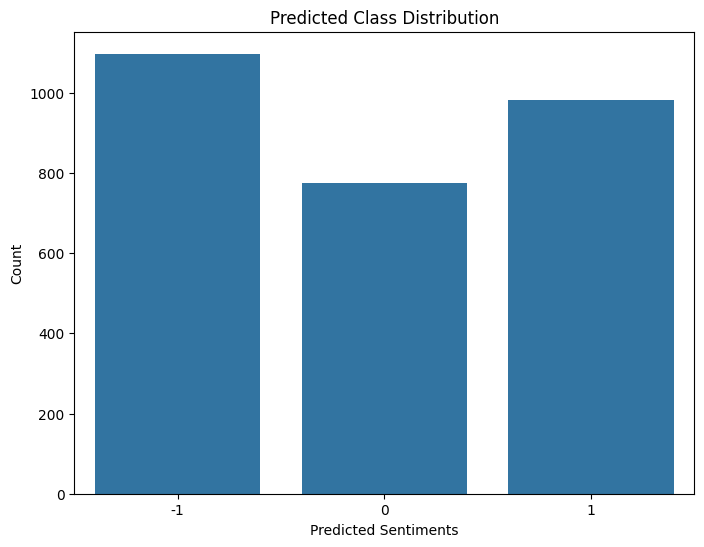

Text: Saya sangat menyukai produk ini!
Predicted Sentiment: negative

Text: Pelayanan yang sangat buruk dan mengecewakan.
Predicted Sentiment: negative

Text: Produk ini biasa saja, tidak ada yang istimewa.
Predicted Sentiment: positive



In [11]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score
import seaborn as sns
import numpy as np

# Precision-Recall curve
def plot_precision_recall_curve(y_val, y_pred_proba):
    plt.figure(figsize=(8, 6))
    for i, label in enumerate([-1, 0, 1]):
        precision, recall, _ = precision_recall_curve(y_val == label, y_pred_proba[:, i])
        plt.plot(recall, precision, lw=2, label=f"Class {label} (PR curve)")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

# ROC curve
def plot_roc_curve(y_val, y_pred_proba):
    plt.figure(figsize=(8, 6))
    for i, label in enumerate([-1, 0, 1]):
        fpr, tpr, _ = roc_curve(y_val == label, y_pred_proba[:, i])
        auc_score = roc_auc_score(y_val == label, y_pred_proba[:, i])
        plt.plot(fpr, tpr, lw=2, label=f"Class {label} (AUC = {auc_score:.2f})")
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

# Class Distribution in predictions
def plot_class_distribution(y_val, y_pred):
    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x=y_pred, order=[-1, 0, 1])
    ax.set(xlabel='Predicted Sentiments', ylabel='Count', title='Predicted Class Distribution')
    plt.show()

# Predictions on sample texts
def test_model_with_samples(texts, vectorizer, model):
    for text in texts:
        cleaned_text = preprocess_text(text)
        vectorized_text = vectorizer.transform([cleaned_text])
        prediction = model.predict(vectorized_text)[0]
        print(f"Text: {text}\nPredicted Sentiment: {'positive' if prediction == 1 else 'negative' if prediction == -1 else 'neutral'}\n")

# Prediction probabilities
y_pred_proba = nb.predict_proba(X_val)

# Plot precision-recall curve
plot_precision_recall_curve(y_val, y_pred_proba)

# Plot ROC curve
plot_roc_curve(y_val, y_pred_proba)

# Plot class distribution in predictions
plot_class_distribution(y_val, y_pred)

# Testing the model with new Indonesian text samples
sample_texts = [
    "Saya sangat menyukai produk ini!",
    "Pelayanan yang sangat buruk dan mengecewakan.",
    "Produk ini biasa saja, tidak ada yang istimewa."
]
test_model_with_samples(sample_texts, vectorizer, nb)